# 2. Working with datatypes

In [7]:
import pandas as pd
import numpy as np

In [8]:
from io import StringIO

In [76]:
%matplotlib inline

## 2.1. Transforming data types

### 2.1.1. Specifying column data types

In [141]:
data = ('a,b,c,d,e,f,g\n'
    '4,2010-10-02,1,2,3,4,cat1\n'
    '1,2010-10-03,5,6,7,8,cat2\n'
    '5,2010-10-04,9,10,11,12,cat3\n'
    '1.1,2010-10-05,1.1,2.0,1.1,,cat4')
data

'a,b,c,d,e,f,g\n4,2010-10-02,1,2,3,4,cat1\n1,2010-10-03,5,6,7,8,cat2\n5,2010-10-04,9,10,11,12,cat3\n1.1,2010-10-05,1.1,2.0,1.1,,cat4'

In [144]:
df

,a,b,c,d,e,f,g
0,4.0,2010-10-02,1.0,2,3,4.0,cat1
1,1.0,2010-10-03,5.0,6,7,8.0,cat2
2,5.0,2010-10-04,9.0,10,11,12.0,cat3
3,1.1,2010-10-05,1.1,2,1.1,NaN,cat4


In [150]:
df = pd.read_csv(
    StringIO(data),
    dtype={'b': object, 'c': np.float64, 'd': 'Int64', 'e': 'category'})

df.dtypes

a     float64
b      object
c     float64
d       Int64
e    category
f     float64
g      object
dtype: object

In [152]:
df.b = df.b.astype('datetime64[ns]')
df.b

0   2010-10-02
1   2010-10-03
2   2010-10-04
3   2010-10-05
Name: b, dtype: datetime64[ns]

*Warning:* object type can lead to mishandle information

### 2.1.2. Converters

In [317]:
data = ("col_1\n1\n2\n'A'\n4.22")

df = pd.read_csv(StringIO(data))
df

,col_1
0,1
1,2
2,'A'
3,4.22


In [323]:
df['col_1'] =  df.col_1.apply(lambda x : [1,2])

df['col_1'] = df['col_1'].astype(str)

In [332]:
df.dtypes

col_1    object
dtype: object

In [331]:
df.col_1.apply(lambda x : eval(x))

0    [1, 2]
1    [1, 2]
2    [1, 2]
3    [1, 2]
Name: col_1, dtype: object

In [333]:
df = pd.read_csv(StringIO(data), converters={'col_1': list})

df['col_1'].apply(type).value_counts()

<class 'list'>    4
Name: col_1, dtype: int64

In [334]:
df.col_1.iloc[0]

['1']

In [156]:
df.col_1.dtype

dtype('O')

In [157]:
df2 = pd.read_csv(StringIO(data))

df2['col_1'] = pd.to_numeric(df2['col_1'], errors='coerce')
df2.col_1.dtype

dtype('float64')

In [158]:
df2

,col_1
0,1.00
1,2.00
2,NaN
3,4.22


## 2.2. Working with text data

### 2.2.1. Text Data Types

There are two ways to store text data in pandas:

- *object* -dtype NumPy array.

- *StringDtype* extension type.

We recommend using StringDtype to store text data.

In [250]:
pd.Series(['a', 'b', 'c'])

0    a
1    b
2    c
dtype: object

In [251]:
pd.Series(['a', 'b', 'c'], dtype="string")

0    a
1    b
2    c
dtype: string

In [252]:
pd.Series(['a', 'b', 'c'], dtype=pd.StringDtype())

0    a
1    b
2    c
dtype: string

**Behavior differences**

These are places where the behavior of StringDtype objects differ from object dtype

- For StringDtype, string accessor methods that return numeric output will always return a nullable integer dtype, rather than either int or float dtype, depending on the presence of NA values. Methods returning boolean output will return a nullable boolean dtype.

- Some string methods, like Series.str.decode() are not available on StringArray because StringArray only holds strings, not bytes.

- In comparison operations, arrays.StringArray and Series backed by a StringArray will return an object with BooleanDtype, rather than a bool dtype object. Missing values in a StringArray will propagate in comparison operations, rather than always comparing unequal like numpy.nan.

In [253]:
s = pd.Series(["a", None, "b"], dtype="string")

In [254]:
s.str.count("a")

0       1
1    <NA>
2       0
dtype: Int64

**Warning:** StringArray is currently considered experimental. The implementation and parts of the API may change without warning.

### 2.2.2. String Methods

Series and Index are equipped with a set of string processing methods that make it easy to operate on each element of the array. Perhaps most importantly, these methods exclude missing/NA values automatically. These are accessed via the str attribute and generally have names matching the equivalent (scalar) built-in string methods:

In [261]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'], dtype="string")
s

0       A
1       B
2       C
3    Aaba
4    Baca
5    <NA>
6    CABA
7     dog
8     cat
dtype: string

In [262]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5    <NA>
6    caba
7     dog
8     cat
dtype: string

In [257]:
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5    <NA>
6    CABA
7     DOG
8     CAT
dtype: string

In [258]:
s.str.len()

0       1
1       1
2       1
3       4
4       4
5    <NA>
6       4
7       3
8       3
dtype: Int64

In [260]:
idx = pd.Index([' jack', 'jill ', ' jesse ', 'frank'])
idx.str.strip()

Index(['jack', 'jill', 'jesse', 'frank'], dtype='object')

**Note:** If you have a Series where lots of elements are repeated (i.e. the number of unique elements in the Series is a lot smaller than the length of the Series), it can be faster to convert the original Series to one of type category and then use .str.<method> or .dt.<property> on that. The performance difference comes from the fact that, for Series of type category, the string operations are done on the .categories and not on each element of the Series.

### 2.2.3. Splitting and replacing strings


In [264]:
s2 = pd.Series(['a_b_c', 'c_d_e', np.nan, 'f_g_h'], dtype="string")
s2

0    a_b_c
1    c_d_e
2     <NA>
3    f_g_h
dtype: string

**Splitting**

In [265]:
s2.str.split('_')

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

In [266]:
s2.str.split('_').str.get(1)

0       b
1       d
2    <NA>
3       g
dtype: object

In [269]:
s2.str.split('_', expand=True, n=1)

,0,1
0,a,b_c
1,c,d_e
2,<NA>,<NA>
3,f,g_h


**Replacing**

In [271]:
s3 = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca',
                '', np.nan, 'CABA', 'dog', 'cat'],
    dtype="string")
s3

0       A
1       B
2       C
3    Aaba
4    Baca
5        
6    <NA>
7    CABA
8     dog
9     cat
dtype: string

In [272]:
s3.str.replace('^.a|dog', 'XX-XX ', case=False)

0           A
1           B
2           C
3    XX-XX ba
4    XX-XX ca
5            
6        <NA>
7    XX-XX BA
8      XX-XX 
9     XX-XX t
dtype: string

In [273]:
s3.str.replace('a','dog', regex=False)

0           A
1           B
2           C
3    Adogbdog
4    Bdogcdog
5            
6        <NA>
7        CABA
8         dog
9       cdogt
dtype: string

### 2.2.4. Concatenation


In [274]:
t = pd.Series(['a', 'b', np.nan, 'd'], dtype="string")
t

0       a
1       b
2    <NA>
3       d
dtype: string

In [275]:
t.str.cat(sep=',', na_rep='-')

'a,b,-,d'

In [276]:
t.str.cat(['A', 'B', 'C', 'D'])

0      aA
1      bB
2    <NA>
3      dD
dtype: string

In [278]:
df1 = pd.DataFrame({
    'col_1': ['a', 'b', np.nan, 'd'],
    'col_2': ['A', 'B', 'C', 'D']
})
df1

,col_1,col_2
0,a,A
1,b,B
2,NaN,C
3,d,D


In [280]:
df1.col_1 + df1.col_2

0     aA
1     bB
2    NaN
3     dD
dtype: object

In [307]:
df1.dropna().apply(lambda x: ''.join(x), axis=1)

0    aA
1    bB
3    dD
dtype: object

In [308]:
d = pd.concat([t, s], axis=1)
d

,0,1
0,a,A
1,b,B
2,<NA>,C
3,d,Aaba
4,<NA>,Baca
5,<NA>,<NA>
6,<NA>,CABA
7,<NA>,dog
8,<NA>,cat


### 2.2.5. Extracting substrings and Matching

In [309]:
pd.Series(['a1', 'b2', 'c3'],dtype="string").str.extract(r'([ab])(\d)', expand=False)

,0,1
0,a,1
1,b,2
2,<NA>,<NA>


### 2.2.6. Creating indicator variables

You can extract dummy variables from string columns. For example if they are separated by a '|':

In [310]:
s = pd.Series(['a', 'a|b', np.nan, 'a|c'], dtype="string")
s

0       a
1     a|b
2    <NA>
3     a|c
dtype: string

In [311]:
s.str.get_dummies(sep='|')

,a,b,c
0,1,0,0
1,1,1,0
2,0,0,0
3,1,0,1


## 2.3. Working with missing data

The choice of using **NaN** internally to denote missing data was largely for simplicity and performance reasons. 

Starting from pandas 1.0, some optional data types start experimenting with a native NA scalar using a mask-based approach.

### 2.3.1. Values considered “missing”

As data comes in many shapes and forms, pandas aims to be flexible with regard to handling missing data. While NaN is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object. In many cases, however, the Python None will arise and we wish to also consider that “missing” or “not available” or “NA”.

**Note**

If you want to consider inf and -inf to be “NA” in computations, you can set 
```
pandas.options.mode.use_inf_as_na = True.
```

In [39]:
df = pd.DataFrame(np.random.randn(5, 3), 
    index=['a', 'c', 'e', 'f', 'h'],
    columns=['one', 'two', 'three'])
df['four'] = 'bar'
df['five'] = df['one'] > 0

df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,0.215429,-1.075732,-1.132656,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,0.915416,-0.838992,-0.331155,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-1.330844,-1.798344,-0.910802,bar,False
f,-0.586712,-1.921112,-0.231328,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,0.465491,-1.161186,-0.593510,bar,True


**Detecting missing values isna() and notna()**

In [21]:
pd.isna(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

**Warning**

One has to be mindful that in Python (and NumPy), the nan's don’t compare equal, but None's do. Note that pandas/NumPy uses the fact that np.nan != np.nan, and treats None like np.nan.

In [22]:
None == None

True

In [14]:
np.nan == np.nan

False

In [16]:
df2[df2.one.notna()]

,one,two,three,four,five
a,1.399715,-0.759668,-0.084547,bar,True
c,-1.049600,0.658426,-0.592594,bar,False
e,0.161586,-0.121128,-0.014520,bar,True
f,-1.183597,0.170641,-0.551335,bar,False
h,0.824049,0.268547,0.630105,bar,True


**Nullabe Integer dtype**

Because NaN is a float, this forces an array of integers with any missing values to become floating point. In some cases, this may not matter much. But if your integer column is, say, an identifier, casting to float can be problematic. Some integers cannot even be represented as floating point numbers.

In [23]:
dfp = pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype())
dfp

0       1
1       2
2    <NA>
3       4
dtype: Int64

In [24]:
dfp.isna()

0    False
1    False
2     True
3    False
dtype: bool

**Nullabe Boolean dtype**

pandas allows indexing with NA values in a boolean array, which are treated as False.

In [61]:
pd.Series([True, False, np.nan], dtype="object") | True

0     True
1     True
2    False
dtype: bool

In [62]:
pd.Series([True, False, np.nan], dtype="boolean") | True

0    True
1    True
2    True
dtype: boolean

In [63]:
pd.Series([True, False, np.nan], dtype="boolean") & True

0     True
1    False
2     <NA>
dtype: boolean

**Nullabe Datetime dtype**

For datetime64[ns] types, **NaT** represents missing values. This is a pseudo-native sentinel value that can be represented by NumPy in a singular dtype (datetime64[ns]). pandas objects provide compatibility between NaT and NaN.

In [35]:
df3 = df.copy()
df3['timestamp'] = pd.Timestamp('20120101')
df3.loc[['a', 'c', 'h'], ['one', 'timestamp']] = np.nan
df3

,one,two,three,four,five,timestamp
a,NaN,0.623999,0.240791,bar,True,NaT
c,NaN,0.868188,-1.057859,bar,False,NaT
e,0.082260,-1.325115,-0.750883,bar,True,2012-01-01
f,-1.101377,0.392915,0.793718,bar,False,2012-01-01
h,NaN,-0.605556,1.297203,bar,True,NaT


In [36]:
df3.dtypes.value_counts()

float64           3
datetime64[ns]    1
object            1
bool              1
dtype: int64

In [38]:
df3.timestamp.isna().sum()

3

### 2.3.2. Inserting missing data


In [29]:
s = pd.Series([1, 2, 3])
s.loc[0] = None
s

0    NaN
1    2.0
2    3.0
dtype: float64

### 2.3.3. Calculations with missing data


- When summing data, NA (missing) values will be treated as zero.
- If the data are all NA, the result will be 0.
- The sum of an empty or all-NA Series or column of a DataFrame is 0.
- The product of an empty or all-NA Series or column of a DataFrame is 1.
- Cumulative methods like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

In [32]:
pd.Series([np.nan]).sum()

0.0

In [31]:
pd.Series([], dtype="float64").sum()

0.0

In [33]:
pd.Series([np.nan]).prod()

1.0

In [40]:
df2

,one,two,three,four,five
a,0.215429,-1.075732,-1.132656,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,0.915416,-0.838992,-0.331155,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-1.330844,-1.798344,-0.910802,bar,False
f,-0.586712,-1.921112,-0.231328,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,0.465491,-1.161186,-0.593510,bar,True


In [41]:
df2['one'].sum()

-0.32121972722169145

In [42]:
df2['one'].mean()

-0.06424394544433829

In [46]:
df2['one'].cumsum(skipna=False)

a    0.215429
b         NaN
c         NaN
d         NaN
e         NaN
f         NaN
g         NaN
h         NaN
Name: one, dtype: float64

In [45]:
df2['one'].cumsum(skipna=True)

a    0.215429
b         NaN
c    1.130845
d         NaN
e   -0.199999
f   -0.786711
g         NaN
h   -0.321220
Name: one, dtype: float64

### 2.3.4. NA values in GroupBy

NA groups in GroupBy are automatically excluded. This behavior is consistent with R, for example:



In [47]:
df2.groupby('one').mean()

,two,three
one,,
-1.330844,-1.798344,-0.910802
-0.586712,-1.921112,-0.231328
0.215429,-1.075732,-1.132656
0.465491,-1.161186,-0.593510
0.915416,-0.838992,-0.331155


### 2.3.5. Cleaning / filling missing data


In [48]:
df2['one'].dropna()

a    0.215429
c    0.915416
e   -1.330844
f   -0.586712
h    0.465491
Name: one, dtype: float64

In [51]:
df2['one'].fillna(-np.Inf)

a    0.215429
b        -inf
c    0.915416
d        -inf
e   -1.330844
f   -0.586712
g        -inf
h    0.465491
Name: one, dtype: float64

In [57]:
df2

,one,two,three,four,five
a,0.215429,-1.075732,-1.132656,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,0.915416,-0.838992,-0.331155,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-1.330844,-1.798344,-0.910802,bar,False
f,-0.586712,-1.921112,-0.231328,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,0.465491,-1.161186,-0.593510,bar,True


In [60]:
df2.five.fillna(True, inplace=True)
df2.dropna(axis=1)

,five
a,True
b,True
c,True
d,True
e,False
f,False
g,True
h,True


## 2.3. Categorical data

This is an introduction to pandas categorical data type, including a short comparison with R’s factor.

The categorical data type is useful in the following cases:

- A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory, see here.

- The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order, see here.

- As a signal to other Python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).

In [64]:
df_wt_client = pd.read_pickle("./data/df_wt_client.pkl")
df_wt_client.shape

(254951, 22)

In [65]:
df_wt_client.head()

,Id,Url,CreationDate,Client_Type,ClientId,AgencyName,Detected_Info,Response,ResponseDate,Total_Occupancy,...,ExecutionDate,PropertyId,Date,Hour,Detected_Info_Len,Is_Detected_Info,ResponseDict,ResponseContent,ResponseType,ResponseSubtype
0,567029556,https://images.inmofactory.com/inmofactory/doc...,2020-03-17 06:20:17,Profesional,900040000042,BARIN,"[{'text': 'shotoNmIplte', 'centroid': [246, 83...","{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-17 06:30:35,0.01,...,2020-03-17 05:30:02,20224813,2020-03-17,05,3,CON_TEXTO,{'recognition': {'@id': 'sdrn:adevinta:recogni...,"[{'text': 'shotoNmIplte', 'boundingBox': {'top...",OK,OK
1,567017990,https://d.fotocasa.es/anuncio/2019/05/20/15126...,2020-03-17 05:43:23,Profesional,9202762585543,Haya Real Estate,"[{'text': '28', 'centroid': [715, 396], 'occup...","{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-17 06:30:37,0.00,...,2020-03-17 05:30:02,151261112,2020-03-17,05,1,CON_TEXTO,{'recognition': {'@id': 'sdrn:adevinta:recogni...,"[{'text': '28', 'boundingBox': {'topLeft': {'x...",OK,OK
2,567028234,https://d.fotocasa.es/anuncio/2019/08/07/15229...,2020-03-17 06:13:39,Profesional,9202762993528,Haya Real Estate,[],"{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-17 06:30:37,0.00,...,2020-03-17 05:30:02,152298490,2020-03-17,05,0,SIN_TEXTO,{'recognition': {'@id': 'sdrn:adevinta:recogni...,[],OK,OK
3,567018766,https://d.fotocasa.es/anuncio/2019/06/12/15158...,2020-03-17 05:47:21,Profesional,9202762585543,Haya Real Estate,[],"{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-17 06:30:38,0.00,...,2020-03-17 05:30:02,151582418,2020-03-17,05,0,SIN_TEXTO,{'recognition': {'@id': 'sdrn:adevinta:recogni...,[],OK,OK
4,567017338,https://d.fotocasa.es/anuncio/2020/02/03/15441...,2020-03-17 05:40:59,Profesional,9202753963841,Haya Real Estate,"[{'text': 'soamnt', 'centroid': [1096, 691], '...","{""recognition"":{""@id"":""sdrn:adevinta:recogniti...",2020-03-17 06:30:42,0.02,...,2020-03-17 05:30:02,154417275,2020-03-17,05,1,CON_TEXTO,{'recognition': {'@id': 'sdrn:adevinta:recogni...,"[{'text': 'soamnt', 'boundingBox': {'topLeft':...",OK,OK


### 2.3.1 Object creation


In [66]:
df_wt_client['Client_Type_cat'] = \
    df_wt_client.Client_Type.astype('category')

In [70]:
df_wt_client['Client_Type']

0         Profesional
1         Profesional
2         Profesional
3         Profesional
4         Profesional
             ...     
530503    Profesional
530504    Profesional
530505    Profesional
530506    Profesional
530507    Profesional
Name: Client_Type, Length: 254951, dtype: object

In [67]:
df_wt_client['Client_Type_cat']

0         Profesional
1         Profesional
2         Profesional
3         Profesional
4         Profesional
             ...     
530503    Profesional
530504    Profesional
530505    Profesional
530506    Profesional
530507    Profesional
Name: Client_Type_cat, Length: 254951, dtype: category
Categories (2, object): [Particular, Profesional]

In [69]:
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')}, dtype="category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   A       4 non-null      category
 1   B       4 non-null      category
dtypes: category(2)
memory usage: 344.0 bytes


### 2.3.2 Controlling behavior: CategoricalDtype

In the examples above where we passed dtype='category', we used the default behavior:

- Categories are inferred from the data.

- Categories are unordered.

To control those behaviors, instead of passing 'category', use an instance of CategoricalDtype.

In [79]:
from pandas.api.types import CategoricalDtype

In [80]:
s = pd.Series(["a", "b", "c", "a"])

cat_type = CategoricalDtype(
    categories=["b", "c", "d"],
    ordered=True)

In [81]:
s_cat = s.astype(cat_type)
s_cat

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): [b < c < d]

**Description**

Using describe() on categorical data will produce similar output to a Series or DataFrame of type string.


In [82]:
s_cat.describe()

count     2
unique    2
top       c
freq      1
dtype: object

### 2.3.3. Working with categories

Categorical data has a categories and a ordered property, which list their possible values and whether the ordering matters or not. These properties are exposed as s.cat.categories and s.cat.ordered. If you don’t manually specify categories and ordering, they are inferred from the passed arguments.

In [102]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

In [97]:
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [98]:
s.cat.ordered

False

**Renaming categories**

In [103]:
s.cat.categories = ["Group %s" % g for g in s.cat.categories]
s

0    Group a
1    Group b
2    Group c
3    Group a
dtype: category
Categories (3, object): [Group a, Group b, Group c]

In [100]:
s.cat.rename_categories(['a', 'b', 'c'])

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

**Appeding categories**

In [104]:
s = s.cat.add_categories(['Group d'])
s

0    Group a
1    Group b
2    Group c
3    Group a
dtype: category
Categories (4, object): [Group a, Group b, Group c, Group d]

**Removing categories**

In [105]:
s = s.cat.remove_categories(['Group d'])
s

0    Group a
1    Group b
2    Group c
3    Group a
dtype: category
Categories (3, object): [Group a, Group b, Group c]

**Sorting and order**

In [106]:
s = pd.Series(pd.Categorical(["a", "b", "c", "a"], ordered=False))
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

In [108]:
s.sort_values(inplace=True)
s

0    a
3    a
1    b
2    c
dtype: category
Categories (3, object): [a, b, c]

In [109]:
s.cat.as_ordered()

0    a
3    a
1    b
2    c
dtype: category
Categories (3, object): [a < b < c]

In [111]:
s = pd.Series(["a", "b", "c", "a"]).astype(
    CategoricalDtype(ordered=True))
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a < b < c]

In [113]:
s.sort_values(inplace=True)
s

0    a
3    a
1    b
2    c
dtype: category
Categories (3, object): [a < b < c]

**Reordering**

In [114]:
s = s.cat.reorder_categories(['c', 'a', 'b'], ordered=True)
s

0    a
3    a
1    b
2    c
dtype: category
Categories (3, object): [c < a < b]

In [115]:
s.sort_values(inplace=True)
s

2    c
0    a
3    a
1    b
dtype: category
Categories (3, object): [c < a < b]

**Comparing**

*Equality semantics:* Two instances of CategoricalDtype compare equal whenever they have the same categories and order. When comparing two unordered categoricals, the order of the categories is not considered.

In [116]:
c1 = CategoricalDtype(['a', 'b', 'c'], ordered=False)
c1

CategoricalDtype(categories=['a', 'b', 'c'], ordered=False)

Equal, since order is not considered when ordered=False

In [117]:
c1 == CategoricalDtype(['b', 'c', 'a'], ordered=False)

True

Unequal, since the second CategoricalDtype is ordered

In [118]:
c1 == CategoricalDtype(['a', 'b', 'c'], ordered=True)

False

All instances of CategoricalDtype compare equal to the string 'category'.

### 2.3.4. Getting data in/out


In [123]:
s = pd.Series(pd.Categorical(['a', 'b', 'b', 'a', 'a', 'd']))

# rename the categories
s.cat.categories = ["very good", "good", "bad"]
s

0    very good
1         good
2         good
3    very good
4    very good
5          bad
dtype: category
Categories (3, object): [very good, good, bad]

In [124]:
# reorder the categories and add missing categories
s = s.cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
s

0    very good
1         good
2         good
3    very good
4    very good
5          bad
dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [126]:
df = pd.DataFrame({"cats": s, "vals": [1, 2, 3, 4, 5, 6]})
df

,cats,vals
0,very good,1
1,good,2
2,good,3
3,very good,4
4,very good,5
5,bad,6


In [125]:
csv = StringIO()

df.to_csv(csv)

df2 = pd.read_csv(StringIO(csv.getvalue()))
df2

,Unnamed: 0,cats,vals
0,0,very good,1
1,1,good,2
2,2,good,3
3,3,very good,4
4,4,very good,5
5,5,bad,6


In [130]:
df2.cats

0    very good
1         good
2         good
3    very good
4    very good
5          bad
Name: cats, dtype: object

In [131]:
df2["cats"] = df2["cats"].astype("category")
df2.cats

0    very good
1         good
2         good
3    very good
4    very good
5          bad
Name: cats, dtype: category
Categories (3, object): [bad, good, very good]

In [133]:
df2["cats"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"],
    inplace=True)
df2.cats

0    very good
1         good
2         good
3    very good
4    very good
5          bad
Name: cats, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

The same holds for writing to a SQL database with to_sql.

### 2.3.5. Missing data

In [134]:
s = pd.Series(["a", "b", np.nan, "a"], dtype="category")
s

0      a
1      b
2    NaN
3      a
dtype: category
Categories (2, object): [a, b]

In [135]:
pd.isna(s)

0    False
1    False
2     True
3    False
dtype: bool

In [136]:
s.fillna("a")

0    a
1    b
2    a
3    a
dtype: category
Categories (2, object): [a, b]

**Differences to R’s factor**

The following differences to R’s factor functions can be observed:

- R’s levels are named categories.

- R’s levels are always of type string, while categories in pandas can be of any dtype.

- It’s not possible to specify labels at creation time. Use s.cat.rename_categories(new_labels) afterwards.

- In contrast to R’s factor function, using categorical data as the sole input to create a new categorical series will not remove unused categories but create a new categorical series which is equal to the passed in one!

- R allows for missing values to be included in its levels (pandas’ categories). Pandas does not allow NaN categories, but missing values can still be in the values.

**Gotchas**

***Memory usage***

The memory usage of a Categorical is proportional to the number of categories plus the length of the data. In contrast, an object dtype is a constant times the length of the data.

***Categorical is not a numpy array***

Currently, categorical data and the underlying Categorical is implemented as a Python object and not as a low-level NumPy array dtype. This leads to some problems.

***dtype in apply***

Pandas currently does not preserve the dtype in apply functions: If you apply along rows you get a Series of object dtype (same as getting a row -> getting one element will return a basic type) and applying along columns will also convert to object. NaN values are unaffected. You can use fillna to handle missing values before applying a function.

In [137]:
df = pd.DataFrame({"a": [1, 2, 3, 4],
    "b": ["a", "b", "c", "d"],
    "cats": pd.Categorical([1, 2, 3, 2])})

df.apply(lambda row: type(row["cats"]), axis=1)

0    <class 'int'>
1    <class 'int'>
2    <class 'int'>
3    <class 'int'>
dtype: object

***Categorical index***

CategoricalIndex is a type of index that is useful for supporting indexing with duplicates. This is a container around a Categorical and allows efficient indexing and storage of an index with a large number of duplicated elements. 

## 2.6. Time series and date functionality

pandas contains extensive capabilities and features for working with time series data for all domains. Using the NumPy datetime64 and timedelta64 dtypes, pandas has consolidated a large number of features from other Python libraries like scikits.timeseries as well as created a tremendous amount of new functionality for manipulating time series data.

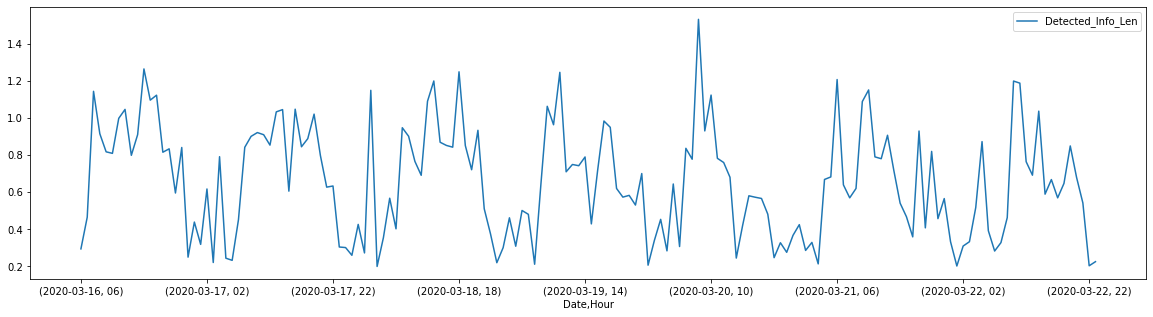

In [78]:
df_wt_client[['Date','Hour','Detected_Info_Len']] \
    .groupby(['Date','Hour']).mean() \
    .plot(figsize=(20,5))

**Date functionality Python style**

In [169]:
import datetime as dt

In [165]:
df_wt_client.ExecutionDate.iloc[0]

Timestamp('2020-03-17 05:30:02')

In [166]:
df_wt_client.ExecutionDate.astype(str).iloc[0]

'2020-03-17 05:30:02'

In [164]:
df_wt_client.ExecutionDate.dtype

dtype('<M8[ns]')

**Date functionality Python style: str to datetime (and reverse)**

In [170]:
df_wt_client.head(5).ExecutionDate \
    .astype(str).apply(
        lambda x : dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

0   2020-03-17 05:30:02
1   2020-03-17 05:30:02
2   2020-03-17 05:30:02
3   2020-03-17 05:30:02
4   2020-03-17 05:30:02
Name: ExecutionDate, dtype: datetime64[ns]

In [175]:
df_wt_client.head(5).ExecutionDate \
    .apply(
        lambda x : dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S')
).astype(str)

0    2020-03-17 05:30:02
1    2020-03-17 05:30:02
2    2020-03-17 05:30:02
3    2020-03-17 05:30:02
4    2020-03-17 05:30:02
Name: ExecutionDate, dtype: object

**Date functionality Python style: days, months and years**

In [178]:
df_wt_client.head(2).ExecutionDate \
    .apply(
        lambda x : x.day)

0    17
1    17
Name: ExecutionDate, dtype: int64

In [179]:
df_wt_client.head(2).ExecutionDate \
    .apply(
        lambda x : x.month)

0    3
1    3
Name: ExecutionDate, dtype: int64

In [180]:
df_wt_client.head(2).ExecutionDate \
    .apply(
        lambda x : x.year)

0    2020
1    2020
Name: ExecutionDate, dtype: int64

**Date functionality Python style: timedeltas**

In [181]:
df_wt_client.head(2).ExecutionDate \
    .apply(
        lambda x : x.day)

0    17
1    17
Name: ExecutionDate, dtype: int64

In [183]:
df_wt_client.head(2).ExecutionDate \
    .apply(
        lambda x : (x + dt.timedelta(days=2)).day)

0    19
1    19
Name: ExecutionDate, dtype: int64

### 2.6.1. Overview
pandas captures 4 general time related concepts:

- Date times: A specific date and time with timezone support. Similar to datetime.datetime from the standard library.

- Time deltas: An absolute time duration. Similar to datetime.timedelta from the standard library.

- Time spans: A span of time defined by a point in time and its associated frequency.

- Date offsets: A relative time duration that respects calendar arithmetic. Similar to dateutil.relativedelta.relativedelta from the dateutil package.

In [159]:
pd.Series(range(3), index=pd.date_range('2000', freq='D', periods=3))

2000-01-01    0
2000-01-02    1
2000-01-03    2
Freq: D, dtype: int64

In [160]:
pd.Series([pd.DateOffset(1), pd.DateOffset(2)])

0         <DateOffset>
1    <2 * DateOffsets>
dtype: object

Lastly, pandas represents null date times, time deltas, and time spans as NaT which is useful for representing missing or null date like values and behaves similar as np.nan does for float data.

In [161]:
pd.Timestamp(pd.NaT)

NaT

In [162]:
pd.Timedelta(pd.NaT)

NaT

In [163]:
pd.Period(pd.NaT)

NaT

### 2.6.2. Timestamps vs. Time Spans

Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

In [187]:
pd.Timestamp(dt.datetime(2012, 5, 1))

Timestamp('2012-05-01 00:00:00')

However, in many cases it is more natural to associate things like change variables with a time span instead. The span represented by Period can be specified explicitly, or inferred from datetime string format.

In [188]:
pd.Period('2011-01')

Period('2011-01', 'M')

**Generating ranges of timestamps**

In [189]:
pd.date_range('2018-01-01', periods=3, freq='H')

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [200]:
start = dt.datetime(2011, 1, 1)
end = dt.datetime(2011, 6, 1)
pd.date_range(start, end)

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2011-05-23', '2011-05-24', '2011-05-25', '2011-05-26',
               '2011-05-27', '2011-05-28', '2011-05-29', '2011-05-30',
               '2011-05-31', '2011-06-01'],
              dtype='datetime64[ns]', length=152, freq='D')

### 2.6.3. Converting to Timestamps

To convert a Series or list-like object of date-like objects e.g. strings, epochs, or a mixture, you can use the to_datetime function.

In [190]:
pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-01-10', None]))

0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]

We can also use the DatetimeIndex constructor directly:

In [191]:
pd.DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], freq='infer')

DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], dtype='datetime64[ns]', freq='2D')

**Assembling datetime from multiple DataFrame columns**

In [193]:
df = pd.DataFrame({'year': [2015, 2016],
   'month': [2, 3],
   'day': [4, 5],
   'hour': [2, 3]})
df

,year,month,day,hour
0,2015,2,4,2
1,2016,3,5,3


In [194]:
pd.to_datetime(df[['year', 'month', 'day']])

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

**Providing a format argument**

In [196]:
pd.to_datetime('2010/11/12', format='%Y/%m/%d')

**Invalid data**

In [197]:
try:
    pd.to_datetime(['2009/07/31', 'asd'], errors='raise')
except ValueError:
    print("ValueError: ('Unknown string format:', 'asd')")

ValueError: ('Unknown string format:', 'asd')


In [198]:
pd.to_datetime(['2009/07/31', 'asd'], errors='ignore')

Index(['2009/07/31', 'asd'], dtype='object')

Pass errors='coerce' to convert unparseable data to NaT (not a time):

In [199]:
pd.to_datetime(['2009/07/31', 'asd'], errors='coerce')

DatetimeIndex(['2009-07-31', 'NaT'], dtype='datetime64[ns]', freq=None)

**Epoch timestamps**

pandas supports converting integer or float epoch times to Timestamp and DatetimeIndex. The default unit is nanoseconds, since that is how Timestamp objects are stored internally. However, epochs are often stored in another unit which can be specified. These are computed from the starting point specified by the origin parameter.

In [192]:
pd.to_datetime([1349720105, 1349806505, 1349892905,
                1349979305, 1350065705], unit='s')

DatetimeIndex(['2012-10-08 18:15:05', '2012-10-09 18:15:05',
               '2012-10-10 18:15:05', '2012-10-11 18:15:05',
               '2012-10-12 18:15:05'],
              dtype='datetime64[ns]', freq=None)

**Warning:** Conversion of float epoch times can lead to inaccurate and unexpected results. Python floats have about 15 digits precision in decimal. Rounding during conversion from float to high precision Timestamp is unavoidable. The only way to achieve exact precision is to use a fixed-width types (e.g. an int64).

### 2.6.4. Time Series-Related Instance Methods

**Shifting / lagging**

In [213]:
df_wt_client.head(2).ExecutionDate.dtype

dtype('<M8[ns]')

In [214]:
df_wt_client.head(2).ExecutionDate.shift(5)

0   NaT
1   NaT
Name: ExecutionDate, dtype: datetime64[ns]

In [240]:
ts = df_wt_client.head(5).ExecutionDate \
    .astype(str).apply(
        lambda x : dt.datetime.strptime(x[:10],'%Y-%m-%d'))
ts = pd.DataFrame(ts).set_index('ExecutionDate')
ts

""
ExecutionDate
2020-03-17
2020-03-17
2020-03-17
2020-03-17
2020-03-17


In [241]:
ts.tshift(5, freq='D')

""
ExecutionDate
2020-03-22
2020-03-22
2020-03-22
2020-03-22
2020-03-22


**Resampling**

Pandas has a simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [242]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00     20
2012-01-01 00:00:01    290
2012-01-01 00:00:02    147
2012-01-01 00:00:03    154
2012-01-01 00:00:04    363
                      ... 
2012-01-01 00:01:35     48
2012-01-01 00:01:36     59
2012-01-01 00:01:37     30
2012-01-01 00:01:38     83
2012-01-01 00:01:39    185
Freq: S, Length: 100, dtype: int64

In [244]:
ts.resample('1Min').sum()

2012-01-01 00:00:00    13807
2012-01-01 00:01:00     8823
Freq: T, dtype: int64

**Interpolation**

In [245]:
s = pd.Series([0, 2, np.nan, 8])
s

0    0.0
1    2.0
2    NaN
3    8.0
dtype: float64

In [246]:
s.interpolate(method='polynomial', order=2)

0    0.000000
1    2.000000
2    4.666667
3    8.000000
dtype: float64

**Time zone handling**

pandas provides rich support for working with timestamps in different time zones using the pytz and dateutil libraries or class:datetime.timezone objects from the standard library.

In [247]:
rng = pd.date_range('3/6/2012 00:00', periods=15, freq='D')

rng.tz is None

True

To localize these dates to a time zone (assign a particular time zone to a naive date), you can use the tz_localize method or the tz keyword argument in date_range(), Timestamp, or DatetimeIndex. You can either pass pytz or dateutil time zone objects or Olson time zone database strings. Olson time zone strings will return pytz time zone objects by default. To return dateutil time zone objects, append dateutil/ before the string.

- In pytz you can find a list of common (and less common) time zones using from pytz import common_timezones, all_timezones.

- dateutil uses the OS time zones so there isn’t a fixed list available. For common zones, the names are the same as pytz.

In [248]:
import dateutil

In [249]:
rng_pytz = pd.date_range(
    '3/6/2012 00:00', 
    periods=3, 
    freq='D',
    tz='Europe/London')

rng_pytz.tz

<DstTzInfo 'Europe/London' LMT-1 day, 23:59:00 STD>